In [13]:
#Librerias utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Lectura del archivo de datos
df = pd.DataFrame( pd.read_csv("vid18_180219.dat", delimiter = ',') )

#Se toman las columnas relevantes para el análisis
df = df.filter(items=["TIMESTAMP","AirTC_Avg"], axis=1)

#Cambiando el nombre de la columna 'AirTC_Avg' a 'TEMP'
df['TEMP'] = df['AirTC_Avg']
df = df.drop(['AirTC_Avg' ], 1)

#Creando columna de tipo fecha a partir de la columna TIMESTAMP
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)

#Borrando la columna TIMESTAMP
df = df.drop(['TIMESTAMP'], 1)

#Creando columnas para hora, día, mes y año.
df['HORA'] = df['FECHA'].dt.hour
df['DIA'] = df['FECHA'].dt.day
df['MES'] = df['FECHA'].dt.month
df['AÑO'] = df['FECHA'].dt.year

df.head()

,TEMP,FECHA,HORA,DIA,MES,AÑO
0,23.50,2018-05-11 20:10:00,20,11,5,2018
1,22.96,2018-05-11 20:20:00,20,11,5,2018
2,22.73,2018-05-11 20:30:00,20,11,5,2018
3,22.40,2018-05-11 20:40:00,20,11,5,2018
4,22.46,2018-05-11 20:50:00,20,11,5,2018


In [35]:
#Creando un dataframe con la fecha a partir del 1ero de noviembre del 2018
df0 = df[(df["FECHA"] >= "2018-11-1")]

#Reseteando los índices y borrando la columna 'index'
df0 = df0.reset_index( drop=True )

#df0 = df0.drop(['index'], 1)

#Se elimina la columna FECHA
df0 = df0.drop(['FECHA'], 1)

df0.head(10)

,TEMP,HORA,DIA,MES,AÑO
0,9.13,0,1,11,2018
1,8.89,0,1,11,2018
2,8.66,0,1,11,2018
3,8.52,0,1,11,2018
4,8.47,0,1,11,2018
5,8.58,0,1,11,2018
6,8.56,1,1,11,2018
7,8.32,1,1,11,2018
8,8.15,1,1,11,2018
9,8.25,1,1,11,2018


In [36]:
#Calcular el promedio de temperatura por hora y se agrega como columna
df0["TEMP_prom"]= np.round( df0.groupby(["AÑO","MES","DIA","HORA"])["TEMP"].transform("mean") , decimals=2 )

#Se eliminan las repeticiones en los datos
df0 = df0.drop_duplicates(subset=['AÑO','MES','DIA','HORA'])

#Se reescriben el índice
df0 = df0.reset_index(drop=True)

df0.head()

,TEMP,HORA,DIA,MES,AÑO,TEMP_prom
0,9.130,0,1,11,2018,8.71
1,8.560,1,1,11,2018,8.49
2,8.830,2,1,11,2018,8.69
3,9.130,3,1,11,2018,8.85
4,7.924,4,1,11,2018,7.40


In [17]:
# Porcentaje de datos por DIA
df1 = pd.DataFrame( df0.groupby('DIA').count() )
df1 = df1.filter( ['TEMP'], axis=1 )
df1 = df1.reset_index()

print("El dia 1 corresponde al 1ero de noviembre de 2018")
for i in range( 0 , len(df1) ):
    Numero_Datos = df1["TEMP"][i]-1
    print("Día:", df1['DIA'][i], "Número de datos:", Numero_Datos, ", Porcentaje de datos:", np.round((Numero_Datos*100)/365.0, decimals=2), "%")

El dia 1 corresponde al 1ero de noviembre de 2018
Día: 1 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 2 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 3 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 4 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 5 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 6 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 7 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 8 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 9 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 10 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 11 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 12 Número de datos: 94 , Porcentaje de datos: 25.75 %
Día: 13 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 14 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 15 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 16 Número de datos: 95 , Porcentaje de datos: 26.03 %
Día: 17 Número 

In [38]:
# Se contarán sólo cuando las Horas de Frío Efectivas sean positivas.
# HF = El número de horas frío por día (0 < T <= 10ºC)
HF = []
for i in range( 0 , len(df0) ):
    if( 0 < df0['TEMP_prom'][i] <= 10 ):
        HF.append(1)
    else:
        HF.append(0)

# HC =  Número de horas con T >= 25ºC
HC = []
for i in range( 0 , len(df0) ):
    if( df0['TEMP_prom'][i] >= 25 ):
        HC.append(1)
    else:
        HC.append(0)

In [39]:
#Cálculo de las Unidades de Frío (UF)
UF = []
for i in range( 0 , len(df0) ):
    if( df0['TEMP_prom'][i]<=1.4 ):
        UF.append(0.0)
    elif( 1.5 <= df0['TEMP_prom'][i] <= 2.4 ):
        UF.append(0.5)
    elif( 2.5 <=df0['TEMP_prom'][i] <= 9.1 ):
        UF.append(1.0)
    elif( 9.2 <=df0['TEMP_prom'][i] <= 12.4 ):
        UF.append(0.5)
    elif( 12.5 <=df0['TEMP_prom'][i] <= 15.9 ):
        UF.append(0.0)
    elif( 12.5 <=df0['TEMP_prom'][i] <= 15.9 ):
        UF.append(0.0)
    elif( 16.0 <=df0['TEMP_prom'][i] <= 18.0 ):
        UF.append(-0.5)
    elif( 18.0 <=df0['TEMP_prom'][i] ):
        UF.append(-1.0)

In [40]:
#Se agregan columnas al data frame con los valores de HF, HC y UF
df0['HF']=pd.Series(HF)
df0['HC']=pd.Series(HC)
df0['UF']=pd.Series(UF)

#UF24 = Unidades Frío por día
#HF24 = Número de Horas Frío por día
#HC24 = Número de Horas Calientes por día
df0["UF24"] = df0.groupby(["AÑO","MES","DIA"])["UF"].transform("sum")
df0["HF24"] = df0.groupby(["AÑO","MES","DIA"])["HF"].transform("sum")
df0["HC24"] = df0.groupby(["AÑO","MES","DIA"])["HC"].transform("sum")

#Eliminando datos repetidos
df0 = df0.drop_duplicates( subset=['AÑO','MES','DIA'] )
df0 = df0.reset_index( drop=True )

#HFE = El número de horas frío efectivas por día ( HFE = HF24 - HC24)
df0['HFE']= df0.HF24 - df0.HC24

df0.head(20)

,TEMP,HORA,DIA,MES,AÑO,TEMP_prom,HF,HC,UF,UF24,HF24,HC24,HFE
0,9.13,0,1,11,2018,8.71,1,0,1.0,-0.5,8,6,2
1,10.79,0,2,11,2018,10.56,0,0,0.5,-9.0,0,8,-8
2,12.85,0,3,11,2018,12.47,0,0,0.0,-9.5,0,8,-8
3,13.14,0,4,11,2018,12.73,0,0,0.0,-11.5,0,8,-8
4,14.41,0,5,11,2018,13.95,0,0,0.0,-8.0,0,8,-8
5,12.19,0,6,11,2018,12.80,0,0,0.0,-11.5,0,8,-8
6,14.45,0,7,11,2018,13.99,0,0,0.5,-8.0,0,8,-8
7,12.51,0,8,11,2018,12.01,0,0,0.5,-9.5,0,8,-8
8,13.10,0,9,11,2018,12.34,0,0,0.5,-8.0,0,8,-8
9,12.50,0,10,11,2018,12.12,0,0,0.5,-5.0,3,6,-3


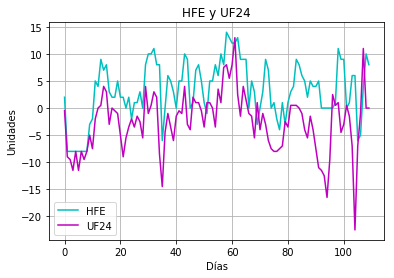

In [42]:
#Crear gráfica de evolución de HFE y UF24
HFE = [ df0['HFE'][i] for i in range( 0 , len(df0) ) ]
UF24 = [ df0['UF24'][i] for i in range( 0 , len(df0) ) ]

plt.plot( HFE, label = "HFE", color = 'c' )   
plt.plot( UF24, label = "UF24", color = 'm' )   
plt.xlabel("Días")   
plt.ylabel("Unidades")  
plt.legend()
plt.grid()
plt.title('HFE y UF24')
plt.savefig('HFE+UF24',plt=2000)
plt.show()

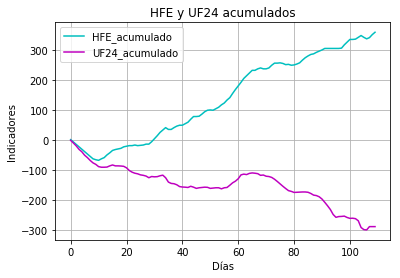

In [43]:
#UF24 acumulado y HFE acumulado
HFE_acumulado = df0['HFE'].cumsum()
UF24_acumulado = df0['UF24'].cumsum()

#Gráficas de UF24 y HFE
plt.plot( HFE_acumulado , label = "HFE_acumulado", color = 'c')   
plt.plot( UF24_acumulado , label = "UF24_acumulado", color = 'm' )   
plt.xlabel("Días")   
plt.ylabel("Indicadores")  
plt.legend()
plt.grid()
plt.title('HFE y UF24 acumulados')
plt.savefig('HFE_acumulado+U24_acumulado',plt=2000)
plt.show()